## Polynomials 2

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 

In [50]:
# def polynomial_fit(x_train, y_train, x_test, degree):
#     coefficients = np.polyfit(x_train, y_train, degree)
#     y_test = np.polyval(coefficients, x_test)
#     return y_test

In [65]:
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2

n_points=16
noise_level=0.2

n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(5) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

12 4


(-0.5, 2.0)

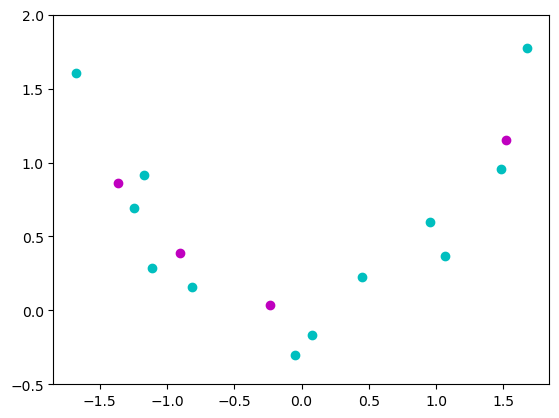

In [74]:
# plt.plot(all_x, all_y)
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

/var/folders/w_/_4hnpxr91r78y8gdhv58zlrm0000gn/T/ipykernel_4790/2960568636.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, degree)


(-0.5, 2.0)

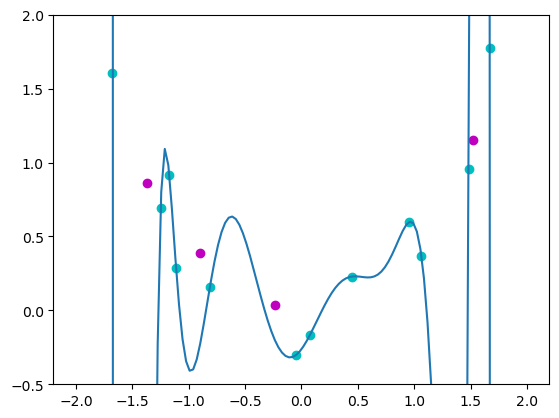

In [82]:
degree=50
coefficients = np.polyfit(x_train, y_train, degree)
all_y_fit = np.polyval(coefficients, all_x)

plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.plot(all_x, all_y_fit)

plt.ylim([-0.5, 2])

Interesting, seems like `np.polyfit` isn't going to play this game lol. 